In [6]:
from langgraph.graph import StateGraph, END
from nodes import retrieve_answer, is_confident_enough, ask_followup_question, generate_answer
from state import FAQState

# Graph definition
builder = StateGraph(FAQState)
builder.add_node("retrieve_answer", retrieve_answer)
builder.add_node("is_confident_enough", is_confident_enough)
builder.add_node("generate_answer", generate_answer)
builder.add_node("ask_followup_question", ask_followup_question)

# Edges
builder.set_entry_point("retrieve_answer")
builder.add_edge("retrieve_answer", "is_confident_enough")
builder.add_conditional_edges("is_confident_enough", lambda state: state["confidence"], {
    "yes": "generate_answer",
    "no": "ask_followup_question"
})
builder.add_edge("generate_answer", END)
builder.add_edge("ask_followup_question", END)

graph = builder.compile()


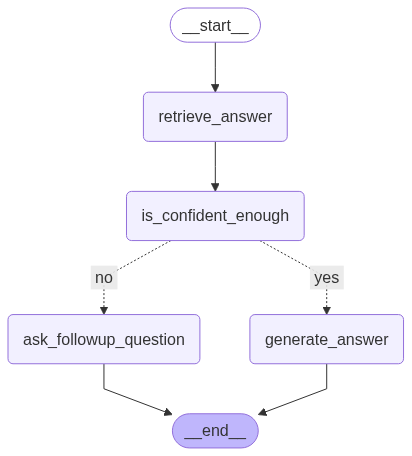

In [7]:
from IPython.display import Image, display
# from langgraph_faq import graph

# Assuming you have a graph_builder (StateGraph instance)
# graph_builder = StateGraph(YourStateType)
# ... (add nodes and edges to graph_builder) ...

# graph = build_form_graph()

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass